In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, SGD
from keras.callbacks import EarlyStopping
import tensorflow 
from tensorflow.keras.layers import Input, Dense, RNN, LSTM
from tensorflow.keras import Model
from tensorflow.keras import regularizers
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score



In [2]:
inputs = Input(shape=(31,))
dense2 = Dense(7,activation='relu')(inputs)
keras.layers.Dropout(0.68)
output = Dense(1,activation='linear')(dense2)
model = Model(inputs,output)
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mse'])

In [3]:
teamData = pd.read_csv("team_season.csv")
print(teamData.shape)
teamDataTrain = teamData.loc[437:1156, :]

(1187, 36)


In [4]:
teamDataTest = teamData.loc[1157: , :]
print(teamDataTest.shape)

(30, 36)


In [5]:
teamID = teamData['team'] 
x = teamData.drop(columns=['team','year','leag','won','lost'])
x.tail()

,o_fgm,o_fga,o_ftm,o_fta,o_oreb,o_dreb,o_reb,o_asts,o_pf,o_stl,...,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_3pm,d_3pa,d_pts,pace
1182,2923,6450,1535,2120,987,2489,3476,1771,1716,613,...,3296,1385,1891,594,1246,421,323,881,7248,91.455696
1183,2882,6498,1683,2131,1041,2311,3352,1487,1943,553,...,3104,1698,1948,508,1127,390,470,1317,7925,91.244949
1184,2952,6656,1626,2101,844,2444,3288,1670,1875,621,...,3711,1814,1795,507,1188,360,435,1222,8311,95.012611
1185,2828,6301,1719,2272,1047,2243,3290,1826,2189,541,...,3089,1592,2057,646,1213,474,486,1297,7975,91.195145
1186,2966,6794,1795,2476,1133,2374,3507,1563,1806,716,...,3527,1885,1994,586,1276,412,521,1432,8268,96.008492


In [6]:
x['target']  = teamData['won']/(teamData['won']+teamData['lost'])

In [7]:
x.head()

,o_fgm,o_fga,o_ftm,o_fta,o_oreb,o_dreb,o_reb,o_asts,o_pf,o_stl,...,d_asts,d_pf,d_stl,d_to,d_blk,d_3pm,d_3pa,d_pts,pace,target
0,1397,5133,811,1375,0,0,0,470,1202,0,...,0,0,0,0,0,0,0,3900,0.0,0.366667
1,1879,6309,939,1550,0,0,0,436,1473,0,...,0,0,0,0,0,0,0,4471,0.0,0.639344
2,1674,5699,903,1428,0,0,0,494,1246,0,...,0,0,0,0,0,0,0,4308,0.0,0.500000
3,1437,5843,923,1494,0,0,0,482,1351,0,...,0,0,0,0,0,0,0,3918,0.0,0.333333
4,1465,5255,951,1438,0,0,0,457,1218,0,...,0,0,0,0,0,0,0,3840,0.0,0.550000


In [8]:
xNump = x.to_numpy()

In [9]:
X_features = xNump[:,0:-1]

Y_features = xNump[:,31]



In [10]:
X_features = preprocessing.scale(X_features)
Y_features = preprocessing.scale(Y_features)

In [11]:
#model.fit(X_features,Y_features,validation_split=0.20,epochs =30, shuffle= True)

In [12]:
testTeamA = teamData.loc[438:438, :]
teamID = testTeamA['team'] 
teamA = testTeamA.drop(columns=['team','year','leag','won','lost'])
teamA

,o_fgm,o_fga,o_ftm,o_fta,o_oreb,o_dreb,o_reb,o_asts,o_pf,o_stl,...,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_3pm,d_3pa,d_pts,pace
438,3462,7775,1648,2181,1241,2966,4207,2010,2039,506,...,3863,1918,1954,699,1369,349,0,0,8734,110.53403


Epoch 1/30
34/34 [==============================] - 0s 7ms/step - loss: 1.2388 - mse: 1.2388 - val_loss: 1.1336 - val_mse: 1.1336
Epoch 2/30
34/34 [==============================] - 0s 2ms/step - loss: 1.0619 - mse: 1.0619 - val_loss: 1.0831 - val_mse: 1.0831
Epoch 3/30
34/34 [==============================] - 0s 2ms/step - loss: 0.9745 - mse: 0.9745 - val_loss: 1.0184 - val_mse: 1.0184
Epoch 4/30
34/34 [==============================] - 0s 2ms/step - loss: 0.9048 - mse: 0.9048 - val_loss: 0.9418 - val_mse: 0.9418
Epoch 5/30
34/34 [==============================] - 0s 2ms/step - loss: 0.8417 - mse: 0.8417 - val_loss: 0.8819 - val_mse: 0.8819
Epoch 6/30
34/34 [==============================] - 0s 2ms/step - loss: 0.7913 - mse: 0.7913 - val_loss: 0.7966 - val_mse: 0.7966
Epoch 7/30
34/34 [==============================] - 0s 2ms/step - loss: 0.7461 - mse: 0.7461 - val_loss: 0.7310 - val_mse: 0.7310
Epoch 8/30
34/34 [==============================] - 0s 2ms/step - loss: 0.7004 - mse: 0.70

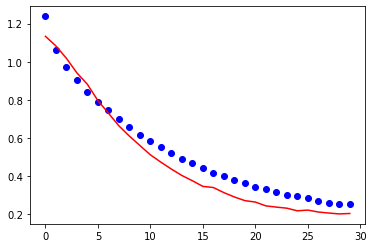

In [13]:
learnR = [100]
for i in learnR:
    history =model.fit(X_features,Y_features,validation_split=0.10,epochs =30, shuffle= True)
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    plt.figure()
    plt.plot(loss_values,'bo',label='training_loss')
    plt.plot(val_loss_values,'r',label='val training loss')
